In [16]:
import numpy as np
import pandas as pd

#Visualization Libraries
import seaborn as sns
import matplotlib.pyplot as plt

#To plot the graph embedded in the notebook
%matplotlib inline

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error

In [1]:
from sklearn import datasets

In [2]:
#loading the dataset direclty from sklearn
boston = datasets.load_boston()

In [3]:
print(type(boston))
print('\n')
print(boston.keys())
print('\n')
print(boston.data.shape)
print('\n')
print(boston.feature_names)

<class 'sklearn.utils.Bunch'>


dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])


(506, 13)


['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [4]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [110]:
bos = pd.DataFrame(boston.data, columns = boston.feature_names)
bos['PRICE'] = boston.target

print(bos.head())


      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  PRICE  
0     15.3  396.90   4.98   24.0  
1     17.8  396.90   9.14   21.6  
2     17.8  392.83   4.03   34.7  
3     18.7  394.63   2.94   33.4  
4     18.7  396.90   5.33   36.2  


In [111]:
bos.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
PRICE      0
dtype: int64

In [112]:
print(bos.describe())

             CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.674032   
std     28.148861    2.1057

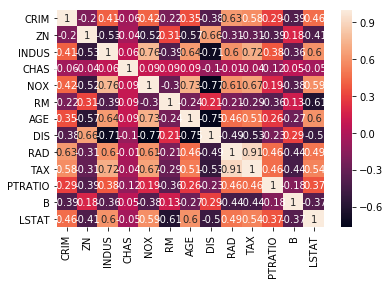

In [13]:

#Created a dataframe without the price col, since we need to see the correlation between the variables
bos_1 = pd.DataFrame(boston.data, columns = boston.feature_names)

correlation_matrix = bos_1.corr().round(2)
sns.heatmap(data=correlation_matrix, annot=True)

From above correlation map, RAD and TAX are highly correlated (0.91) . DIS and AGE also show high correlation of -0.75

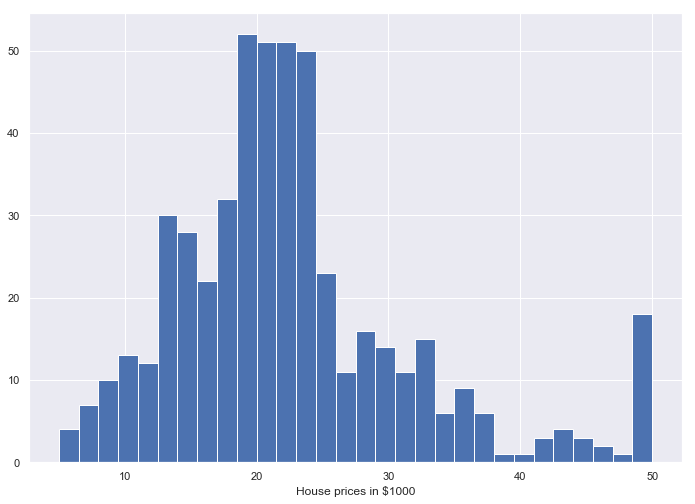

In [14]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
plt.hist(bos['PRICE'], bins=30)
plt.xlabel("House prices in $1000")
plt.show()

### Goodness of Fit for entire boston dataset

In [113]:
X_train_all=bos.drop(['PRICE'],axis=1)
X_train_all.head()
Y_train_all=bos['PRICE']

In [114]:


reg_1 = LinearRegression()
reg_1.fit(X_train_all, Y_train_all)

y_train_predict_all = reg_1.predict(X_train_all)
rmse_all = (np.sqrt(mean_squared_error(Y_train_all, y_train_predict_all)))
r2_all = round(reg_1.score(X_train_all, Y_train_all),2)

print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse_all))
print('R2 score is {}'.format(r2_all))
print("\n")

The model performance for training set
--------------------------------------
RMSE is 4.679191295697282
R2 score is 0.74




In [231]:
from sklearn.feature_selection import RFE
# create the RFE model and select 3 attributes
rfe = RFE(reg_1)
rfe = rfe.fit(X_train_all, Y_train_all)
# summarize the selection of the attributes
print(rfe.support_)
print(rfe.ranking_)

[False False False  True  True  True False  True False False  True False
  True]
[3 5 4 1 1 1 8 1 2 6 1 7 1]


In [245]:
b=bos.columns.tolist()
print(type(b))
rank=rfe.ranking_.tolist()
print(type(rank))

bos_feat_sel = pd.DataFrame(list(zip(b, rank)), 
               columns =['columnname', 'ranking'])
bos_feat_sel

<class 'list'>
<class 'list'>


,columnname,ranking
0,CRIM,3
1,ZN,5
2,INDUS,4
3,CHAS,1
4,NOX,1
5,RM,1
6,AGE,8
7,DIS,1
8,RAD,2
9,TAX,6


Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'PRICE'],
      dtype='object')

Text(0.5, 1.0, 'Actual Prices vs Predicted prices- All data')

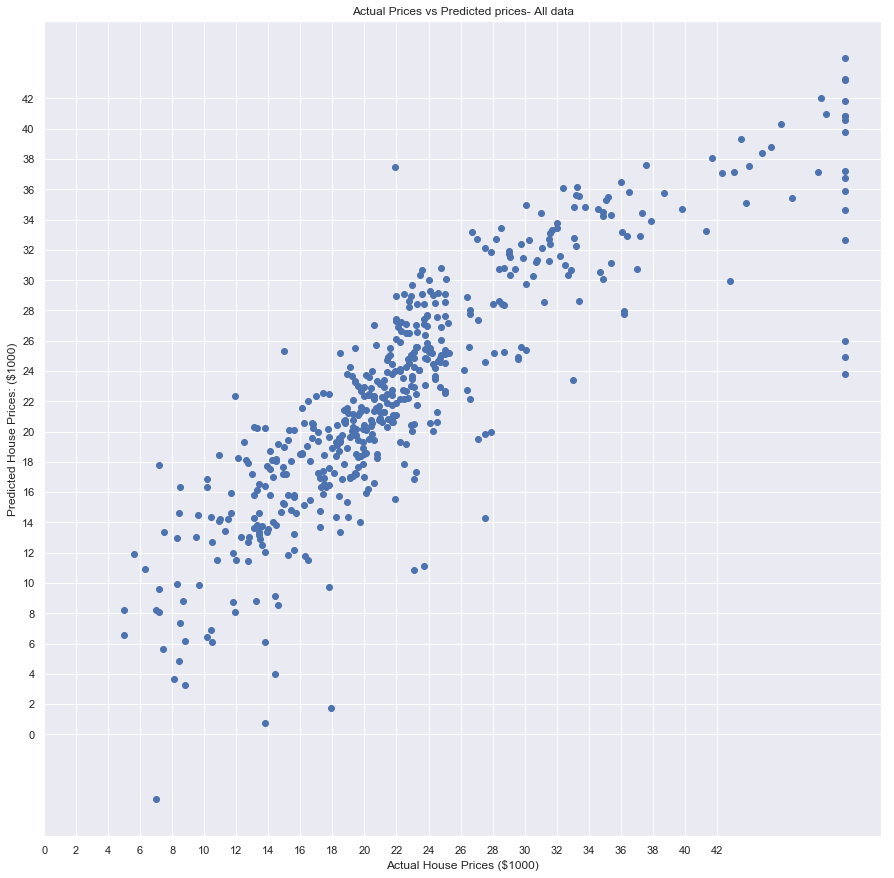

In [115]:
plt.figure(figsize=(15,15))
plt.scatter(Y_train_all, y_train_predict_all)
plt.xlabel("Actual House Prices ($1000)")
plt.ylabel("Predicted House Prices: ($1000)")
plt.xticks(range(0, int(max(y_train_predict_all)),2))
plt.yticks(range(0, int(max(y_train_predict_all)),2))
plt.title("Actual Prices vs Predicted prices- All data")

From EDA, below columns look interesting :

ZN       proportion of residential land zoned for lots over 25,000 sq.ft. -- Has about 50% data as 0. It would be interesting to see if a lot of 0's get nullified would change the prediction

CHAS is the only categorical variable. Can try using that

RAD/TAX are correlated, if one of them is used to nullify

B - has high variability

### Data Missing Completely at Random (CAR)

In [127]:
def new_df(orig_df,per,col_name,seed):
    df_c=orig_df.copy()
    df_size=orig_df.shape[0]
    np.random.seed(0)
    num_nulls=int(round((per/100)*(df_size-1)))
    null_pos=np.random.randint(low=0,high=df_size-1, size=num_nulls)
    for i in null_pos:
        df_c.loc[i][col_name]=None
    return df_c

In [262]:
def df_impute(orig_df,function):
    imputed_df=orig_df.copy()
    if function=='mean':
        imputed_df.fillna(imputed_df.mean(), inplace=True)
    elif function=='median':
        imputed_df.fillna(imputed_df.median(), inplace=True)
    elif function=='mode':
        imputed_df.fillna(imputed_df.mode(), inplace=True)
    else:
        imputed_df.fillna(int(function), inplace=True)
    return imputed_df

In [174]:
 def linear_reg_goodness(df,target):
    
    X_train=df.drop([target],axis=1)
    X_train.head()
    Y_train=df[target]
    

    reg = LinearRegression()
    reg.fit(X_train, Y_train)

    y_train_predict = reg.predict(X_train)
    rmse = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))
    r2 = round(reg.score(X_train, Y_train),2)
    goodness=[rmse,r2]
    return goodness

In [273]:
bos_car_rm_df=[]
per_car_arr=[1,5,10,20,33,50]
bos_car_rm_df=[new_df(bos,p,'RM',999) for p in per_arr]
c=0
for b_df in bos_car_rm_df:
    print(per_arr[c],"% nulls")
    print(b_df.isnull().sum())
    c=c+1
    print("=======================")
    
bos_car_rm_impute_zero_df=[]
bos_car_rm_impute_zero_df=[df_impute(df,'0') for df in bos_car_rm_df]
goodness_car_rm=[]
goodness_car_rm=[linear_reg_goodness(df,'PRICE') for df in bos_car_rm_impute_zero_df]
goodness_car_rm

1 % nulls
CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         5
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
PRICE      0
dtype: int64
5 % nulls
CRIM        0
ZN          0
INDUS       0
CHAS        0
NOX         0
RM         23
AGE         0
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT       0
PRICE       0
dtype: int64
10 % nulls
CRIM        0
ZN          0
INDUS       0
CHAS        0
NOX         0
RM         45
AGE         0
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT       0
PRICE       0
dtype: int64
20 % nulls
CRIM        0
ZN          0
INDUS       0
CHAS        0
NOX         0
RM         87
AGE         0
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT       0
PRICE       0
dtype: int64
33 % nulls
CRIM         0
ZN           0
INDUS        0
CHAS         0
NOX          0
RM         136
AGE          0
DIS          0
RAD  

[[4.883623032349549, 0.72],
 [4.976610046557696, 0.71],
 [4.967029264262159, 0.71],
 [5.035806168801492, 0.7],
 [5.057302565835696, 0.7],
 [5.058254823398979, 0.7]]

In [272]:
bos_car_rm_df=[]
per_car_arr=[1,5,10,20,33,50]
bos_car_rm_df=[new_df(bos,p,'RM',999) for p in per_arr]
bos_car_rm_impute_mean_df=[]
bos_car_rm_impute_mean_df=[df_impute(df,'mean') for df in bos_car_rm_df]
goodness_car_rm=[]
goodness_car_rm=[linear_reg_goodness(df,'PRICE') for df in bos_car_rm_impute_mean_df]
goodness_car_rm

[[4.692669148523668, 0.74],
 [4.713891593417272, 0.74],
 [4.721270539405498, 0.74],
 [4.853928441325208, 0.72],
 [4.8924632910685535, 0.72],
 [4.943278395989387, 0.71]]

### Missing at Random (MAR)

AGE>77, then NOX is random

In [200]:
bos_test2=bos.copy()
bos_test2[bos_test2['AGE']>77]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10,18.9
10,0.22489,12.5,7.87,0.0,0.524,6.377,94.3,6.3467,5.0,311.0,15.2,392.52,20.45,15.0
11,0.11747,12.5,7.87,0.0,0.524,6.009,82.9,6.2267,5.0,311.0,15.2,396.90,13.27,18.9
14,0.63796,0.0,8.14,0.0,0.538,6.096,84.5,4.4619,4.0,307.0,21.0,380.02,10.26,18.2
17,0.78420,0.0,8.14,0.0,0.538,5.990,81.7,4.2579,4.0,307.0,21.0,386.75,14.67,17.5
20,1.25179,0.0,8.14,0.0,0.538,5.570,98.1,3.7979,4.0,307.0,21.0,376.57,21.02,13.6
21,0.85204,0.0,8.14,0.0,0.538,5.965,89.2,4.0123,4.0,307.0,21.0,392.53,13.83,19.6


In [203]:
def indices(list, filtr=lambda x: bool(x)):
    return [i for i,x in enumerate(list) if filtr(x)]

bos_age_mar_indices=indices(bos_test2['AGE'], lambda x: x>77)

In [206]:
np.random.choice(bos_age_mar_indices)

420

In [208]:
def new_mar_df(orig_df,per,col_name,seed,indices):
    df_c=orig_df.copy()
    df_size=orig_df.shape[0]
    np.random.seed(0)
    num_nulls=int(round((per/100)*(df_size-1)))
    for i in range(num_nulls):
        r=np.random.choice(indices)
        df_c.loc[r][col_name]=None
    return df_c

In [210]:
bos_mar_df=[]
per_mar_arr=[10,20,30]
bos_mar_df=[new_mar_df(bos,p,'NOX',999,bos_age_mar_indices) for p in per_mar_arr]

In [211]:
for i in bos_mar_df:
    print(i.shape)

(506, 14)
(506, 14)
(506, 14)


In [212]:
c=0
for b_df in bos_mar_df:
    print(per_mar_arr[c],"% nulls")
    print(b_df.isnull().sum())
    c=c+1
    print("=======================")

10 % nulls
CRIM        0
ZN          0
INDUS       0
CHAS        0
NOX        43
RM          0
AGE         0
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT       0
PRICE       0
dtype: int64
20 % nulls
CRIM        0
ZN          0
INDUS       0
CHAS        0
NOX        80
RM          0
AGE         0
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT       0
PRICE       0
dtype: int64
30 % nulls
CRIM         0
ZN           0
INDUS        0
CHAS         0
NOX        111
RM           0
AGE          0
DIS          0
RAD          0
TAX          0
PTRATIO      0
B            0
LSTAT        0
PRICE        0
dtype: int64


In [215]:
bos_mar_impute_mean_df=[]
bos_mar_impute_mean_df=[df_impute(df,'mean') for df in bos_mar_df]
goodness_mar=[]
goodness_mar=[linear_reg_goodness(df,'PRICE') for df in bos_mar_impute_mean_df]
goodness_mar

[[4.70402998841331, 0.74],
 [4.723059341701854, 0.74],
 [4.735517419799171, 0.73]]

In [216]:
bos_mar_impute_median_df=[]
bos_mar_impute_median_df=[df_impute(df,'median') for df in bos_mar_df]
goodness_mar_med=[]
goodness_mar_med=[linear_reg_goodness(df,'PRICE') for df in bos_mar_impute_median_df]
goodness_mar_med

[[4.707520717313876, 0.74],
 [4.727502712268104, 0.74],
 [4.739129689409382, 0.73]]

In [274]:
bos_mar_impute_zero_df=[]
bos_mar_impute_zero_df=[df_impute(df,'0') for df in bos_mar_df]
goodness_mar_zer=[]
goodness_mar_zer=[linear_reg_goodness(df,'PRICE') for df in bos_mar_impute_zero_df]
goodness_mar_zer

[[4.759011058351853, 0.73],
 [4.7671337980151085, 0.73],
 [4.768835718301644, 0.73]]

### NAR ( Not at Random )

if LSTAT > 17 then PTRATIO is null


In [277]:
bos_nar_df=bos.copy()
bos_nar_df[bos_nar_df['LSTAT']>17].count()

CRIM       126
ZN         126
INDUS      126
CHAS       126
NOX        126
RM         126
AGE        126
DIS        126
RAD        126
TAX        126
PTRATIO    126
B          126
LSTAT      126
PRICE      126
dtype: int64

In [286]:
bos_age_nar_indices=indices(bos_test2['LSTAT'], lambda x: x>17)
bos_age_nar_indices

for i in bos_age_nar_indices:
        bos_nar_df.loc[i]['PTRATIO']=None

In [287]:
bos_nar_df.isnull().sum()

CRIM         0
ZN           0
INDUS        0
CHAS         0
NOX          0
RM           0
AGE          0
DIS          0
RAD          0
TAX          0
PTRATIO    126
B            0
LSTAT        0
PRICE        0
dtype: int64

In [291]:
bos_nar_impute_zero_df=[]
bos_nar_impute_zero_df=df_impute(bos_nar_df,'0')
goodness_nar_zer=[]
goodness_nar_zer=linear_reg_goodness(bos_nar_impute_zero_df,'PRICE')
goodness_nar_zer

[4.900476647079992, 0.72]

In [292]:
bos_nar_impute_mean_df=[]
bos_nar_impute_mean_df=df_impute(bos_nar_df,'mean')
goodness_nar_mean=[]
goodness_nar_mean=linear_reg_goodness(bos_nar_impute_mean_df,'PRICE')
goodness_nar_mean

[4.78445404307053, 0.73]